## Data Exploration & Cleaning
The first part of any data analysis or predictive modeling task is an initial exploration of the data. Even if you collected the data yourself and you already have a list of questions in mind that you want to answer, it is important to explore the data before doing any serious analysis, since oddities in the data can cause bugs and muddle your results. Before exploring deeper questions, you have to answer many simpler ones about the form and quality of data. That said, it is important to go into your initial data exploration with a big picture question in mind since the goal of your analysis should inform how you prepare the data.

In [3]:

# Load in some packages
import calendar
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

dr_sales_df = pd.read_excel(r"C:\Users\jki\Downloads\Sales Master.xlsx")
dr_sales_df.head(6)

,Date,Party,Voucher Type,Voucher No.,GSTIN/UIN,Quantity,Value,Gross Total
0,2017-07-07 00:00:00,Bhavin Jani,SALES,d4a8c69b845073bd,22f9741467a02b6530,136.0,53200.0,65796.0
1,2017-07-07 00:00:00,Jayesh Rege,SALES,40549be5cab3e7a9,23c8d6101b1869f123,24.0,24600.0,31488.0
2,2017-07-07 00:00:00,Farhan Zachariah,SALES,fc4e8e9ba6911989,24f73a863eae7cf9d9,155.0,68660.0,82839.0
3,2017-07-08 00:00:00,Farhan Zachariah,SALES,83c11df1ada57622,24f73a863eae7cf9d9,319.0,164475.0,194860.5
4,2017-07-10 00:00:00,Kabir Raj,SALES,e85983fe05035e77,08b8060280e794624c,110.0,26000.0,31100.0
5,2017-07-12 00:00:00,Aradhya Dhillon,SALES,6fc9e94f41df3696,24b6a7b12f0e96b7b0,2.0,2300.0,2944.0


Exploring The Variables
The first step in exploratory analysis is reading in the data and then exploring the variables. It is important to get a sense of how many variables and cases there are, the data types of the variables and the range of values they take on.

We'll start by reading in the data:

In [4]:
# lets check for mising values
missing_values = dr_sales_df.isna().sum()
print(missing_values)

Date            3573
Party              0
Voucher Type    4404
Voucher No.     4404
GSTIN/UIN       4519
Quantity        4429
Value              0
Gross Total     4404
dtype: int64


In [8]:
# lets remove missing values and confirit
dr_sales_df.dropna(subset=['Date'],inplace=True)
dr_sales_df.dropna(subset=['Voucher Type'],inplace=True)
dr_sales_df.dropna(subset=['Voucher No.'],inplace=True)
dr_sales_df.dropna(subset=['GSTIN/UIN'],inplace=True)
dr_sales_df.dropna(subset=['Gross Total'],inplace=True)
dr_sales_df.dropna(subset=['Quantity'],inplace=True)
# lets check for mising values
missing_values = dr_sales_df.isna().sum()
print(missing_values)

Date            0
Party           0
Voucher Type    0
Voucher No.     0
GSTIN/UIN       0
Quantity        0
Value           0
Gross Total     0
dtype: int64


In [9]:
# let have a look at the data types
dr_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3725 entries, 0 to 3864
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3725 non-null   object 
 1   Party         3725 non-null   object 
 2   Voucher Type  3725 non-null   object 
 3   Voucher No.   3725 non-null   object 
 4   GSTIN/UIN     3725 non-null   object 
 5   Quantity      3725 non-null   float64
 6   Value         3725 non-null   float64
 7   Gross Total   3725 non-null   float64
dtypes: float64(3), object(5)
memory usage: 261.9+ KB


In [11]:
# lets change the date data types
dr_sales_df['Date'] = pd.to_datetime(dr_sales_df['Date'])
# let have a look at the data types
dr_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3725 entries, 0 to 3864
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3725 non-null   datetime64[ns]
 1   Party         3725 non-null   object        
 2   Voucher Type  3725 non-null   object        
 3   Voucher No.   3725 non-null   object        
 4   GSTIN/UIN     3725 non-null   object        
 5   Quantity      3725 non-null   float64       
 6   Value         3725 non-null   float64       
 7   Gross Total   3725 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 261.9+ KB


In [12]:
# lets  extract year,month and hour from date 
dr_sales_df['Year'] = dr_sales_df['Date'].dt.year
dr_sales_df['Month'] = dr_sales_df['Date'].dt.month
dr_sales_df['Hour'] = dr_sales_df['Date'].dt.hour 

dr_sales_df.head(3)

,Date,Party,Voucher Type,Voucher No.,GSTIN/UIN,Quantity,Value,Gross Total,Year,Month,Hour
0,2017-07-07,Bhavin Jani,SALES,d4a8c69b845073bd,22f9741467a02b6530,136.0,53200.0,65796.0,2017,7,0
1,2017-07-07,Jayesh Rege,SALES,40549be5cab3e7a9,23c8d6101b1869f123,24.0,24600.0,31488.0,2017,7,0
2,2017-07-07,Farhan Zachariah,SALES,fc4e8e9ba6911989,24f73a863eae7cf9d9,155.0,68660.0,82839.0,2017,7,0


In [13]:
# let have a look at the data types
dr_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3725 entries, 0 to 3864
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3725 non-null   datetime64[ns]
 1   Party         3725 non-null   object        
 2   Voucher Type  3725 non-null   object        
 3   Voucher No.   3725 non-null   object        
 4   GSTIN/UIN     3725 non-null   object        
 5   Quantity      3725 non-null   float64       
 6   Value         3725 non-null   float64       
 7   Gross Total   3725 non-null   float64       
 8   Year          3725 non-null   int64         
 9   Month         3725 non-null   int64         
 10  Hour          3725 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 349.2+ KB


In [14]:
dr_sales_df['Year'] = pd.to_datetime(dr_sales_df['Year'])
dr_sales_df['Month'] = pd.to_datetime(dr_sales_df['Month'])
dr_sales_df['Hour'] = pd.to_datetime(dr_sales_df['Hour'])
                                                  
# let have a look at the data types
dr_sales_df.info()                                                  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3725 entries, 0 to 3864
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3725 non-null   datetime64[ns]
 1   Party         3725 non-null   object        
 2   Voucher Type  3725 non-null   object        
 3   Voucher No.   3725 non-null   object        
 4   GSTIN/UIN     3725 non-null   object        
 5   Quantity      3725 non-null   float64       
 6   Value         3725 non-null   float64       
 7   Gross Total   3725 non-null   float64       
 8   Year          3725 non-null   datetime64[ns]
 9   Month         3725 non-null   datetime64[ns]
 10  Hour          3725 non-null   datetime64[ns]
dtypes: datetime64[ns](4), float64(3), object(4)
memory usage: 349.2+ KB


In [15]:
# do we have netive values
dr_sales_df.describe()

,Quantity,Value,Gross Total
count,3725.000000,3725.000000,3725.000000
mean,91.495302,24869.369718,29434.818174
std,227.741967,35180.869961,41551.999738
min,1.000000,240.000000,383.000000
25%,10.000000,6175.000000,7316.000000
50%,27.000000,13775.000000,16284.000000
75%,76.000000,28125.000000,33247.000000
max,5100.000000,373500.000000,440730.000000


In [16]:
# lets calculate the uint pricedr_sales_df['Gross Total']
dr_sales_df['Unit Price'] = dr_sales_df['Gross Total']/dr_sales_df['Quantity']
dr_sales_df['Unit Price'].info()

<class 'pandas.core.series.Series'>
Int64Index: 3725 entries, 0 to 3864
Series name: Unit Price
Non-Null Count  Dtype  
--------------  -----  
3725 non-null   float64
dtypes: float64(1)
memory usage: 58.2 KB


In [17]:
dr_sales_df.head(5)

,Date,Party,Voucher Type,Voucher No.,GSTIN/UIN,Quantity,Value,Gross Total,Year,Month,Hour,Unit Price
0,2017-07-07,Bhavin Jani,SALES,d4a8c69b845073bd,22f9741467a02b6530,136.0,53200.0,65796.0,1970-01-01 00:00:00.000002017,1970-01-01 00:00:00.000000007,1970-01-01,483.794118
1,2017-07-07,Jayesh Rege,SALES,40549be5cab3e7a9,23c8d6101b1869f123,24.0,24600.0,31488.0,1970-01-01 00:00:00.000002017,1970-01-01 00:00:00.000000007,1970-01-01,1312.000000
2,2017-07-07,Farhan Zachariah,SALES,fc4e8e9ba6911989,24f73a863eae7cf9d9,155.0,68660.0,82839.0,1970-01-01 00:00:00.000002017,1970-01-01 00:00:00.000000007,1970-01-01,534.445161
3,2017-07-08,Farhan Zachariah,SALES,83c11df1ada57622,24f73a863eae7cf9d9,319.0,164475.0,194860.5,1970-01-01 00:00:00.000002017,1970-01-01 00:00:00.000000007,1970-01-01,610.847962
4,2017-07-10,Kabir Raj,SALES,e85983fe05035e77,08b8060280e794624c,110.0,26000.0,31100.0,1970-01-01 00:00:00.000002017,1970-01-01 00:00:00.000000007,1970-01-01,282.727273


## Data Analysis
Data Analysis is the process of systematically applying statistical and/or logical techniques to describe and illustrate, condense and recap, and evaluate data. It is done after data exploration and cleaning. When we do data analysis we answer questions corresponding to our dataset.

In [18]:
# Load in some packages
import calendar
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

warnings.filterwarnings("ignore")

After we cleaned the data it is important to be able to answer some questions related to the data. In this part we will use graphs and group_by function in order to successfully answer them. The questions we need to answer is the following:

1 What was the best month for sales? How much was earned that month?

2 Which Party had the highest number of sales?

3 What Party are most often sold together?

4 What Voucher sold the most? Why do you think it sold the most?



## 1 What was the best month for sales? How much was earned that month?

In [27]:
# In order to answer this question we need to get all unique months and all sales for each unique month:

# 1. What was the best month for sales? How much was earned that month?

# Assuming 'Month' is in a string format, convert it to datetime first
dr_sales_df['Month'] = pd.to_datetime(dr_sales_df['Month'])

# Extract the month and convert it to int32
dr_sales_df['Month'] = dr_sales_df['Month'].dt.month.astype('int32')

# Convert month numbers to abbreviated month names
dr_sales_df['Month Name'] = dr_sales_df['Month'].apply(lambda x: calendar.month_abbr[x])

# Group by month and calculate total sales for each month
sales_by_month =dr_sales_df.groupby('Month Name').sum()['Gross Total']

# Find the best month for sales and the corresponding earnings
best_month = sales_by_month.idxmax()
earnings_for_best_month = sales_by_month.max()

print(f"The best month for sales was {best_month} with earnings of ${earnings_for_best_month:,.2f}")



The best month for sales was Jan with earnings of $109,644,697.70


In [28]:
unique_Months = dr_sales_df['Month'].apply(lambda x: calendar.month_abbr[x]).unique() # Take all 12 months' names
Sales_by_month = dr_sales_df.groupby('Month').sum()['Gross Total'] # Take the highest number of sales 

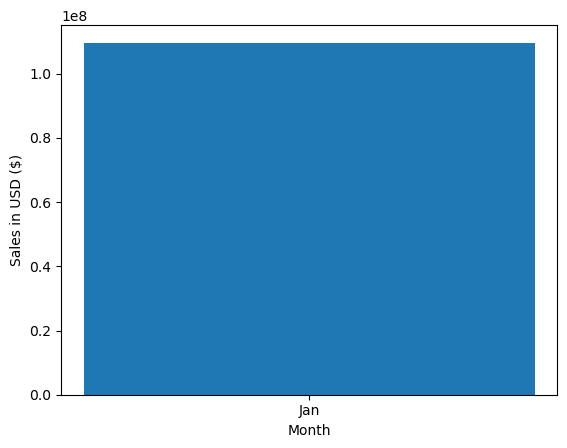

In [29]:
# Plot the highest number of sales for each month
plt.bar(unique_Months, Sales_by_month)
plt.xticks(unique_Months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show()